In [1]:
import matplotlib.pyplot as plt
from numpy import *
from scipy import interpolate
from copy import copy, deepcopy

In [2]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [3]:
class readfield:
    def __init__(self, filename):
        D_file = open(filename, 'r', encoding = 'utf8')
        n = -1
        m = 0
        Dtemp = []
        for line in D_file:
            split_line = line.split();
            if is_number(split_line[0]):
                Dtemp[n].append([])
                Dtemp[n][m].extend([float(position) for position in split_line])
                m = m + 1
            else:
                Dtemp.append([])
                n = n + 1
                m = 0
        D_file.close()
        Dtemp = Dtemp[1]
        
        self.X = reshape([Dtemp[i][0] for i in range(len(Dtemp))],(81,81))*1e-3
        self.Y = reshape([Dtemp[i][1] for i in range(len(Dtemp))],(81,81))*1e-3
        self.Z = Dtemp[0][2]*1e-3
        self.N = int(sqrt(len(Dtemp)))
        self.DX = reshape([Dtemp[i][3] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][4] for i in range(len(Dtemp))],(81,81))
        self.DY = reshape([Dtemp[i][5] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][6] for i in range(len(Dtemp))],(81,81))
        self.DZ = reshape([Dtemp[i][7] for i in range(len(Dtemp))],(81,81)) + 1j*reshape([Dtemp[i][8] for i in range(len(Dtemp))],(81,81))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)
    def __copy__(self):
        return type(self)

In [4]:
class readarray:
    def __init__(self,filenameX1,filenameX2,filenameX3,filenameY1,filenameY2,filenameY3):
        ### X pol
        try:
            D_file = open(filenameX1, 'r', encoding = 'utf8')
            Dtemp = []
            for line in D_file:
                split_line = line.split();
                if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                    Dtemp.append([float(position) for position in split_line])
            D_file.close()
            D_file = open(filenameX2, 'r', encoding = 'utf8')
            for line in D_file:
                split_line = line.split();
                if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                    Dtemp.append([float(position) for position in split_line])
            D_file.close()
            D_file = open(filenameX3, 'r', encoding = 'utf8')
            for line in D_file:
                split_line = line.split();
                if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                    Dtemp.append([float(position) for position in split_line])
            D_file.close()
            self.DX = reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8))
        except OSError:
            print('No X field')
            self.DX = zeros((8,8))
        ### Y pol
        try:
            D_file = open(filenameY1, 'r', encoding = 'utf8')
            Dtemp = []
            for line in D_file:
                split_line = line.split();
                if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                    Dtemp.append([float(position) for position in split_line])
            D_file.close()
            D_file = open(filenameY2, 'r', encoding = 'utf8')
            for line in D_file:
                split_line = line.split();
                if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                    Dtemp.append([float(position) for position in split_line])
            D_file.close()
            D_file = open(filenameY3, 'r', encoding = 'utf8')
            for line in D_file:
                split_line = line.split();
                if is_number(split_line[0]) and float(split_line[0]) == 30.01:
                    Dtemp.append([float(position) for position in split_line])
            D_file.close()
            self.DY = flip(reshape([Dtemp[i][1] + 1j*Dtemp[i][2] for i in range(len(Dtemp))],(8,8)),axis = 1).T
        except OSError:
            print('No Y field')
            self.DY = zeros((8,8))
        self.X, self.Y = meshgrid(linspace(0, 35*1e-3, num=8), linspace(0, 35*1e-3, num=8))
        self.Z = 2*1e-3
        self.N = 8
        self.DZ = zeros((8,8))
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

In [5]:
class combinearray:
    def __init__(self, array1, array2, array3, array4):
        self.DX = zeros((16,16)) + 1j*zeros((16,16))
        self.DX[0:-1:2,0:-1:2] = array1.DX
        self.DX[1:17:2,0:-1:2] = array2.DX
        self.DX[0:-1:2,1:17:2] = array3.DX
        self.DX[1:17:2,1:17:2] = array4.DX
        #self.DX = flip(flip(self.DX,axis = 1),axis = 0)
        #self.DX = self.DX.T
        
        self.DY = zeros((16,16)) + 1j*zeros((16,16))
        self.DY[0:-1:2,0:-1:2] = array1.DY
        self.DY[1:17:2,0:-1:2] = array2.DY
        self.DY[0:-1:2,1:17:2] = array3.DY
        self.DY[1:17:2,1:17:2] = array4.DY
        #self.DY = self.DY.T
        
        self.DZ = zeros((16,16)) + 1j*zeros((16,16))
        self.DZ[0:-1:2,0:-1:2] = array1.DZ
        self.DZ[1:17:2,0:-1:2] = array2.DZ
        self.DZ[0:-1:2,1:17:2] = array3.DZ
        self.DZ[1:17:2,1:17:2] = array4.DZ
        #self.DZ = self.DZ.T
        
        self.X, self.Y = meshgrid(linspace(0, 37.5*1e-3, num=16), linspace(0, 37.5*1e-3, num=16))
        self.Z = 2*1e-3
        self.N = 16
        self.D = swapaxes(stack([self.DX, self.DY, self.DZ],axis=1),1,2)

# Loading data

In [6]:
Eanal = readfield('E.txt')
Hanal = readfield('H.txt')
Hanal.DX.shape

(81, 81)

In [7]:
arr = readarray('multiscan/arrayX.txt','multiscan/arrayX2.txt','multiscan/arrayX3.txt','multiscan/arrayY.txt','multiscan/arrayY2.txt','multiscan/arrayY3.txt')
arr_25x = readarray('multiscan/arrayX1_25x.txt','multiscan/arrayX2_25x.txt','multiscan/arrayX3_25x.txt','multiscan/arrayY1_25x.txt','multiscan/arrayY2_25x.txt','multiscan/arrayY3_25x.txt')
arr_25y = readarray('multiscan/arrayX1_25y.txt','multiscan/arrayX2_25y.txt','multiscan/arrayX3_25y.txt','multiscan/arrayY1_25y.txt','multiscan/arrayY2_25y.txt','multiscan/arrayY3_25y.txt')
arr_25x25y = readarray('multiscan/arrayX1_25x25y.txt','multiscan/arrayX2_25x25y.txt','multiscan/arrayX3_25x25y.txt','multiscan/arrayY1_25x25y.txt','multiscan/arrayY2_25x25y.txt','multiscan/arrayY3_25x25y.txt')
arr.DX.shape

(8, 8)

In [8]:
arr_16 = combinearray(arr, arr_25x, arr_25y, arr_25x25y)

## Interpolating measurement results

In [9]:
f_interpX_real = interpolate.interp2d(arr_16.X, arr_16.Y, real(arr_16.DX), kind='cubic')
f_interpX_imag = interpolate.interp2d(arr_16.X, arr_16.Y, imag(arr_16.DX), kind='cubic')
f_interpY_real = interpolate.interp2d(arr_16.X, arr_16.Y, real(arr_16.DY), kind='cubic')
f_interpY_imag = interpolate.interp2d(arr_16.X, arr_16.Y, imag(arr_16.DY), kind='cubic')

In [10]:
Emeas_interp = deepcopy(Eanal)
Emeas_interp.X = Eanal.X
Emeas_interp.Y = Eanal.Y
Emeas_interp.Z = Eanal.Z
Emeas_interp.DX = (f_interpX_real(Eanal.X[1,:],Eanal.Y[:,1]) + 1j*f_interpX_imag(Eanal.X[1,:],Eanal.Y[:,1])).T
Emeas_interp.DY = (f_interpY_real(Eanal.X[1,:],Eanal.Y[:,1]) + 1j*f_interpY_imag(Eanal.X[1,:],Eanal.Y[:,1])).T
Emeas_interp.DZ = zeros(Eanal.DZ.shape)
Emeas_interp.D = swapaxes(stack([Emeas_interp.DX, Emeas_interp.DY, Emeas_interp.DZ],axis=1),1,2)

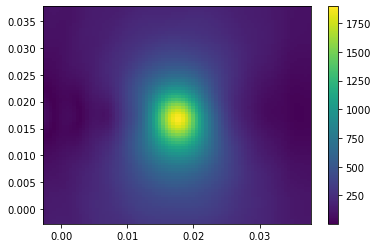

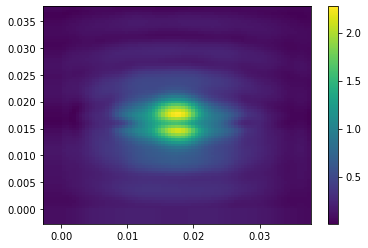

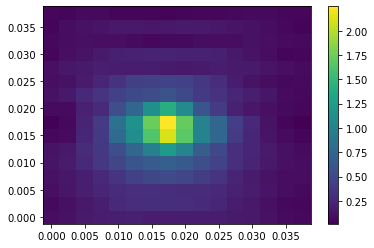

In [11]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DX),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(Eanal.X,Eanal.Y,abs(Emeas_interp.DX),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(arr_16.X,arr_16.Y,abs(arr_16.DX).T,shading='auto')
plt.colorbar()
plt.show()

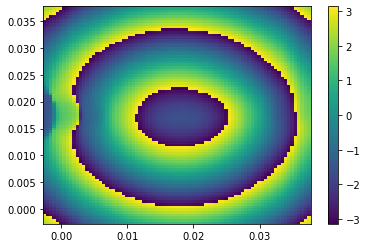

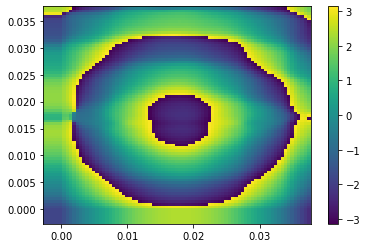

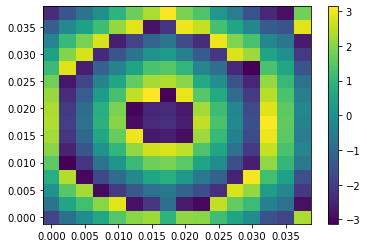

In [12]:
plt.pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DX),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(Emeas_interp.X,Emeas_interp.Y,angle(Emeas_interp.DX*exp(1j*3)),shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(arr_16.X,arr_16.Y,angle(arr_16.DX*exp(1j*3)),shading='auto')
plt.colorbar()
plt.show()

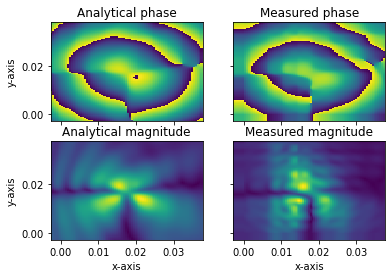

In [13]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DY),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Emeas_interp.X,Emeas_interp.Y,angle(Emeas_interp.DY*exp(1j*3)),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DY),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Emeas_interp.X,Emeas_interp.Y,abs(Emeas_interp.DY*exp(1j*3)),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

# Maxwell's equations check

In [14]:
k0 = 2*pi*3e10/299792458
k0

628.7535065855045

In [15]:
Nspec = Eanal.N
dx = 0.5e-3
dy = 0.5e-3
kx = (-1/2 + (arange(Nspec))/Nspec)*(2*pi/dx)
ky = (-1/2 + (arange(Nspec))/Nspec)*(2*pi/dy)
KX,KY = meshgrid(kx,ky)
KZ = conj(sqrt((k0**2-KX**2-KY**2)*(1+0j)))

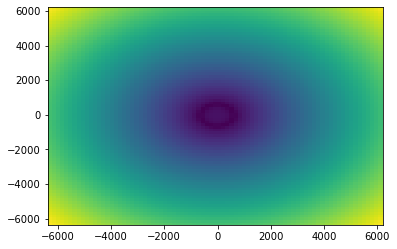

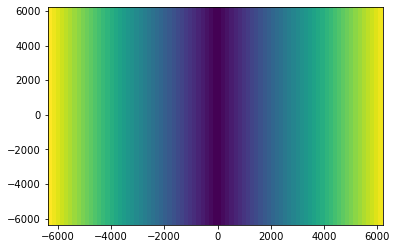

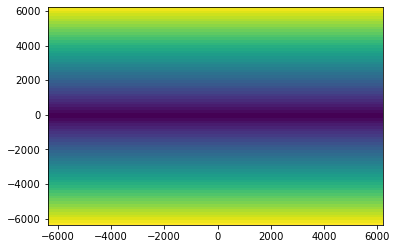

In [16]:
plt.pcolormesh(kx,ky,abs(KZ),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,abs(KX),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,abs(KY),shading='auto')
plt.show()

## Calculate the spectral

In [17]:
sEmeas_interp = deepcopy(Emeas_interp)
sEmeas_interp.X = KX
sEmeas_interp.Y = KY
sEmeas_interp.Z = KZ
sEmeas_interp.DX = fft.fftshift(fft.fft2(fft.ifftshift(Emeas_interp.DX)))
sEmeas_interp.DY = fft.fftshift(fft.fft2(fft.ifftshift(Emeas_interp.DY)))
sEmeas_interp.DZ = fft.fftshift(fft.fft2(fft.ifftshift(Emeas_interp.DZ)))
sEmeas_interp.D = swapaxes(stack([sEmeas_interp.DX, sEmeas_interp.DY, sEmeas_interp.DZ],axis=1),1,2)

### Checking with analytical 

In [18]:
sEanal = deepcopy(Eanal)
sEanal.X = KX
sEanal.Y = KY
sEanal.Z = KZ
sEanal.DX = fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DX)))
sEanal.DY = fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DY)))
sEanal.DZ = fft.fftshift(fft.fft2(fft.ifftshift(Eanal.DZ)))
sEanal.D = swapaxes(stack([sEanal.DX, sEanal.DY, sEanal.DZ],axis=1),1,2)

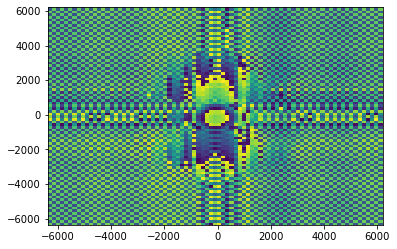

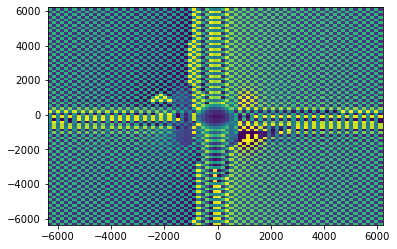

In [19]:
plt.pcolormesh(kx,ky,angle(sEmeas_interp.DX*exp(1j*2)),shading='auto')
plt.show()
plt.pcolormesh(kx,ky,angle(sEanal.DX),shading='auto')
plt.show()

## Reconstruction of Z component

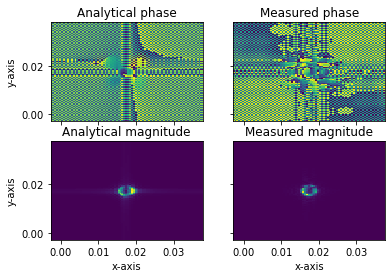

In [20]:
lambda_recz=abs(k0)*1e-2
sEmeas_interp.DZ = -(sEmeas_interp.DX*KX + sEmeas_interp.DY*KY)*(conj(KZ)/(lambda_recz**2+abs(KZ)**2))

fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Eanal.X,Eanal.Y,angle(sEanal.DZ),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Eanal.X,Eanal.Y,angle(sEmeas_interp.DZ*exp(1j*1)),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Eanal.X,Eanal.Y,abs(sEanal.DZ),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Eanal.X,Eanal.Y,abs(sEmeas_interp.DZ),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

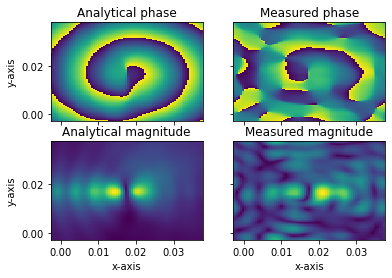

In [21]:
Emeas_interp.DZ = fft.fftshift(fft.ifft2(fft.ifftshift(sEmeas_interp.DZ)))

fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Eanal.X,Eanal.Y,angle(Eanal.DZ),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Eanal.X,Eanal.Y,angle(Emeas_interp.DZ*exp(1j*1)),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Eanal.X,Eanal.Y,abs(Eanal.DZ),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Eanal.X,Eanal.Y,abs(Emeas_interp.DZ),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Calculate the H component 

In [22]:
sHmeas = deepcopy(sEmeas_interp)
sHmeas.X = KX
sHmeas.Y = KY
sHmeas.Z = KZ
sHmeas.DX = (sEmeas_interp.DZ*KY - sEmeas_interp.DY*KZ)/(1j*2*pi*30e9)
sHmeas.DY = (sEmeas_interp.DX*KZ - sEmeas_interp.DZ*KX)/(1j*2*pi*30e9)
sHmeas.DZ = (sEmeas_interp.DY*KX - sEmeas_interp.DX*KY)/(1j*2*pi*30e9)
sHmeas.D = swapaxes(stack([sHmeas.DX, sHmeas.DY, sHmeas.DZ],axis=1),1,2)

In [23]:
Hmeas = deepcopy(Emeas_interp)
Hmeas.X = Emeas_interp.X
Hmeas.Y = Emeas_interp.Y
Hmeas.Z = Emeas_interp.Z
Hmeas.DX = fft.fftshift(fft.ifft2(fft.ifftshift(sHmeas.DX)))
Hmeas.DY = fft.fftshift(fft.ifft2(fft.ifftshift(sHmeas.DY)))
Hmeas.DZ = fft.fftshift(fft.ifft2(fft.ifftshift(sHmeas.DZ)))
Hmeas.D = swapaxes(stack([sHmeas.DX, sHmeas.DY, sHmeas.DZ],axis=1),1,2)

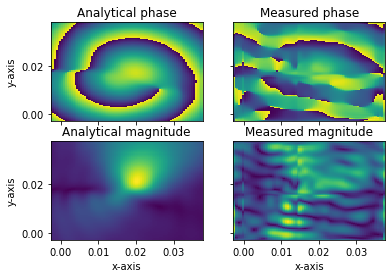

In [24]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Hanal.X,Hanal.Y,angle(Hanal.DX),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Hmeas.X,Hmeas.Y,angle(Hmeas.DX*exp(1j*1)),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Hanal.X,Hanal.Y,abs(Hanal.DX),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Hmeas.X,Hmeas.Y,abs(Hmeas.DX),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

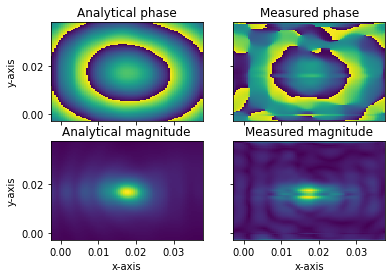

In [25]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Hanal.X,Hanal.Y,angle(Hanal.DY),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Hmeas.X,Hmeas.Y,angle(Hmeas.DY*exp(1j*1)),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Hanal.X,Hanal.Y,abs(Hanal.DY),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Hmeas.X,Hmeas.Y,abs(Hmeas.DY),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

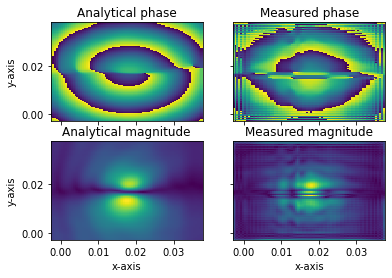

In [26]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].pcolormesh(Hanal.X,Hanal.Y,angle(Hanal.DZ),shading='auto')
axs[0, 0].set_title('Analytical phase')
axs[0, 1].pcolormesh(Hmeas.X,Hmeas.Y,angle(Hmeas.DZ*exp(1j*1)),shading='auto')
axs[0, 1].set_title('Measured phase')
axs[1, 0].pcolormesh(Hanal.X,Hanal.Y,abs(Hanal.DZ),shading='auto')
axs[1, 0].set_title('Analytical magnitude')
axs[1, 1].pcolormesh(Hmeas.X,Hmeas.Y,abs(Hmeas.DZ),shading='auto')
axs[1, 1].set_title('Measured magnitude')

for ax in axs.flat:
    ax.set(xlabel='x-axis', ylabel='y-axis')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Calculate psPD

In [27]:
psPDmeas = sum(abs(cross(Emeas_interp.D,Hmeas.D))**2,2)

In [28]:
psPDanal = sum(abs(cross(Eanal.D,Hanal.D))**2,2)

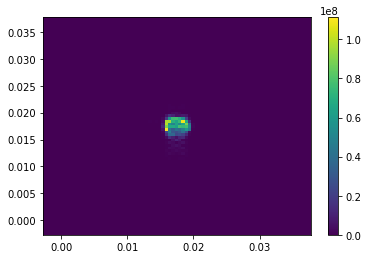

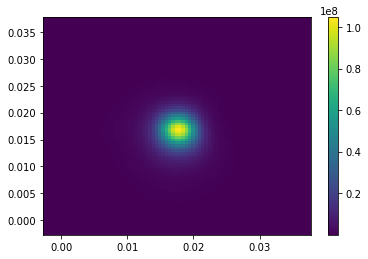

In [29]:
plt.pcolormesh(Eanal.X,Eanal.Y,abs(psPDmeas)*6e18,shading='auto')
plt.colorbar()
plt.show()
plt.pcolormesh(Eanal.X,Eanal.Y,abs(psPDanal),shading='auto')
plt.colorbar()
plt.show()